   ## Housing prices, data analysis and predictions
___

    1 Determining what is the price changes per county from 2010 to 2016


In [4]:
## Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import requests
from census import Census
import gmaps

# Census & gmaps API Keys
from security.census_key import (api_key, gkey)

# Internal functionality
from functions import print_message,calculate_percentage,get_column_des,get_merged_data,get_fields,get_filters,print_message,print_plot,print_bars

zillow_csv = './data/County_MedianListingPrice_AllHomes.csv'

In [59]:
zillow_data = pd.read_csv(zillow_csv)

georgia_fips = 13
county_fips = ['121','135','089','067','063','057','151','117','097','077','045','113','015','297','013','227','085','199','171']

metro_atlanta_data = zillow_data[(zillow_data["StateCodeFIPS"] == georgia_fips) & (zillow_data["MunicipalCodeFIPS"].isin(county_fips))]

metro_atlanta_data = metro_atlanta_data.drop(columns=["State", "Metro", "StateCodeFIPS", "SizeRank"])

metro_atlanta_data.set_index(["MunicipalCodeFIPS", "RegionName"], inplace=True)

metro_atlanta_data = metro_atlanta_data.T

metro_atlanta_data.reset_index(inplace=True)

metro_atlanta_data["year"] = metro_atlanta_data["index"].apply(lambda x: x[:(len(x) - x.find("-")) + 1])

metro_atlanta_data = metro_atlanta_data.drop(columns=["index"])

metro_atlanta_data = metro_atlanta_data.groupby("year").mean()

metro_atlanta_data = metro_atlanta_data.T

metro_atlanta_data


/Users/jleongonzalez/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,year,2010,2011,2012,2013,2014,2015,2016,2017,2018
MunicipalCodeFIPS,RegionName,,,,,,,,,
121,Fulton,214815.000000,184231.250000,197416.666667,233341.666667,251515.500000,263650.416667,303332.500000,352743.125000,382600.0000
135,Gwinnett,167389.041667,141300.000000,141926.666667,181081.666667,200884.583333,218675.083333,237650.083333,255407.375000,279210.3125
89,Dekalb,160808.333333,126400.000000,124391.666667,162425.000000,168195.833333,172700.000000,192253.458333,229408.500000,261293.1250
67,Cobb,193800.000000,172334.500000,180977.958333,216000.000000,235351.708333,250066.250000,283522.916667,299803.291667,317735.6250
63,Clayton,68775.000000,52012.500000,50278.041667,61483.333333,74382.541667,94483.250000,106954.625000,124261.791667,139737.4375
57,Cherokee,206352.166667,181889.166667,181713.125000,213870.208333,236366.666667,257103.416667,283355.041667,302666.958333,324638.3125
151,Henry,140937.500000,118262.500000,109116.666667,138912.500000,169823.958333,184264.166667,191677.708333,207979.916667,227031.6875
117,Forsyth,265569.375000,246064.125000,256564.583333,293114.500000,318494.166667,340270.708333,365837.291667,381648.041667,389126.3125
97,Douglas,138208.333333,116779.166667,107904.166667,130609.375000,150278.916667,160085.208333,177388.750000,187916.250000,196675.5625


## Census API


#### Code and Description
____


* B01003_001E = Population 
* B01002_001E = Median Age 
* B19013_001E = Household Income
* B19301_001E = Per Capita Income
* B25077_001E = Median Value Housing Units
* B17001_002E = Poverty Count 
____


#### County FIPS code
___

* 13121 - Fulton County
* 13135 - Gwinnett County
* 13089 - DeKalb County
* 13067 - Cobb County
* 13063 - Clayton County
* 13057 - Cherokee County
* 13151 - Henry County
* 13117 - Forsyth County
* 13097 - Douglas County
___


In [2]:
# Years to be retrieved from census API
years = np.arange(2010, 2017, 1)

In [3]:
# Run Census Search to retrieve data on all Atlanta metro counties
array_census_data = []

print_message("Starting retrieving data from Census API")

for year in years:
    census_API = Census(api_key, year = year)

    array_census_data.append(pd.DataFrame(census_API.acs5.get(get_fields(), get_filters())).rename(columns = get_column_des(year)))
    
    print(f"Processing data from census on year:{year}")


print_message("Retrieving data from Census API done")


-----------------------------------------
Starting retrieving data from Census API
-----------------------------------------
Processing data from census on year:2010
Processing data from census on year:2011
Processing data from census on year:2012
Processing data from census on year:2013
Processing data from census on year:2014
Processing data from census on year:2015
Processing data from census on year:2016
-----------------------------------------
Retrieving data from Census API done
-----------------------------------------


In [4]:
census_data = get_merged_data(array_census_data, ['Name', 'State', 'MunicipalCodeFIPS'])

census_data.drop(columns="State")

census_data.set_index(["MunicipalCodeFIPS", "Name"], inplace=True)

census_data.head()

,,Median Age 2010,Population 2010,Poverty Count 2010,Household Income 2010,Per Capita Income 2010,Median Value Housing Units 2010,State,Median Age 2011,Population 2011,Poverty Count 2011,...,Poverty Count 2015,Household Income 2015,Per Capita Income 2015,Median Value Housing Units 2015,Median Age 2016,Population 2016,Poverty Count 2016,Household Income 2016,Per Capita Income 2016,Median Value Housing Units 2016
MunicipalCodeFIPS,Name,,,,,,,,,,,,,,,,,,,,,
013,"Barrow County, Georgia",32.9,66359.0,8295.0,48958.0,20882.0,138900.0,13,33.1,68061,8912,...,10902.0,52012.0,21411.0,119700.0,35.0,73340.0,10548.0,53133.0,21978.0,123200.0
015,"Bartow County, Georgia",36.1,97423.0,13472.0,49216.0,22241.0,146800.0,13,36.2,98905,15076,...,15819.0,48893.0,22592.0,123800.0,37.4,101942.0,14899.0,50565.0,23376.0,128200.0
045,"Carroll County, Georgia",33.2,109227.0,18339.0,45559.0,20523.0,139900.0,13,33.5,110292,19253,...,22441.0,43586.0,21320.0,112100.0,34.1,113756.0,21157.0,45486.0,22002.0,113700.0
057,"Cherokee County, Georgia",35.7,206283.0,15143.0,66320.0,30217.0,201900.0,13,36.1,211316,16113,...,24273.0,68926.0,30595.0,190500.0,37.7,230629.0,22891.0,72586.0,32002.0,204400.0
063,"Clayton County, Georgia",31.1,260156.0,42408.0,43311.0,18958.0,127800.0,13,31.3,260756,46881,...,65787.0,40938.0,18107.0,85200.0,32.4,270269.0,64326.0,42470.0,18728.0,86700.0


/Users/jleongonzalez/Desktop/Machine Learning/Project I/Project1/functions.py:60: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  ax.set_color_cycle([cm(1.*i/20) for i in range(20)])
/Users/jleongonzalez/Desktop/Machine Learning/Project I/Project1/functions.py:78: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  ax.set_color_cycle([cm(1.*i/20) for i in range(20)])


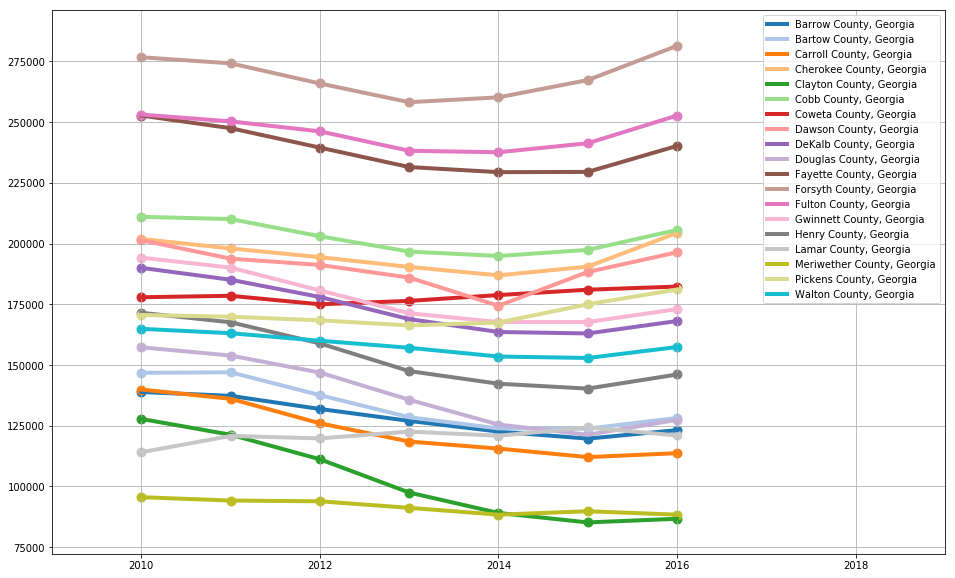

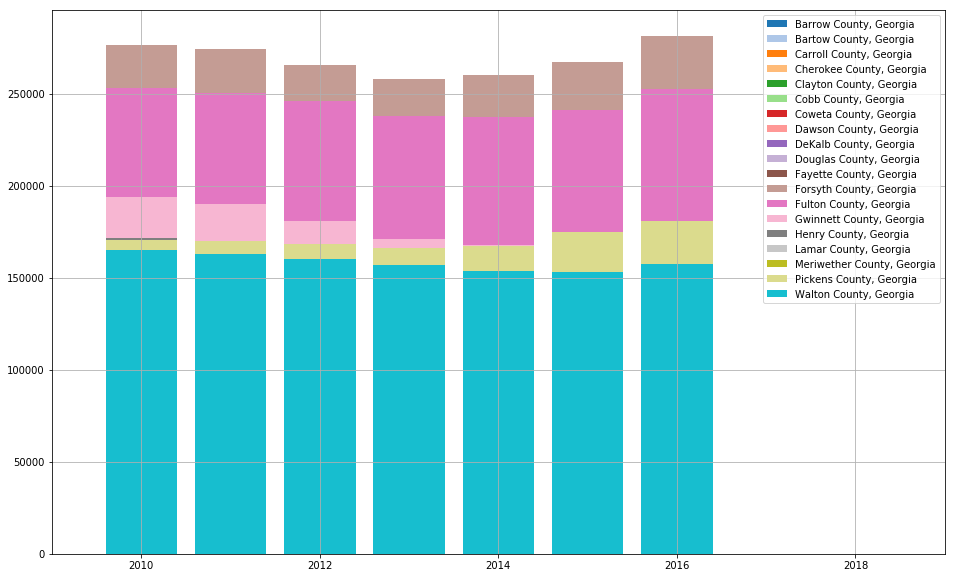

In [5]:
value_housing = census_data[['Median Value Housing Units 2010',
             'Median Value Housing Units 2011',
             'Median Value Housing Units 2012',
             'Median Value Housing Units 2013',
             'Median Value Housing Units 2014',
             'Median Value Housing Units 2015',
             'Median Value Housing Units 2016'
            ]].astype('float')

print_plot(value_housing, years, (2009, 2019))
print_bars(value_housing, years, (2009, 2019))

/Users/jleongonzalez/Desktop/Machine Learning/Project I/Project1/functions.py:60: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  ax.set_color_cycle([cm(1.*i/20) for i in range(20)])


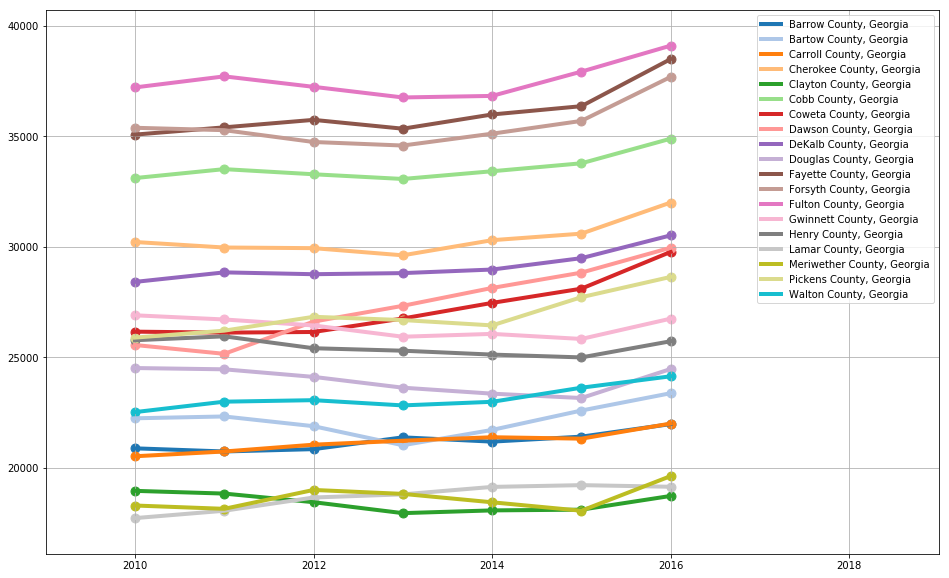

In [6]:
income_capita = census_data[['Per Capita Income 2010',
             'Per Capita Income 2011',
             'Per Capita Income 2012',
             'Per Capita Income 2013',
             'Per Capita Income 2014',
             'Per Capita Income 2015',
             'Per Capita Income 2016'
            ]].astype('float')

print_plot(income_capita, years, (2009, 2019))

/Users/jleongonzalez/Desktop/Machine Learning/Project I/Project1/functions.py:60: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  ax.set_color_cycle([cm(1.*i/20) for i in range(20)])


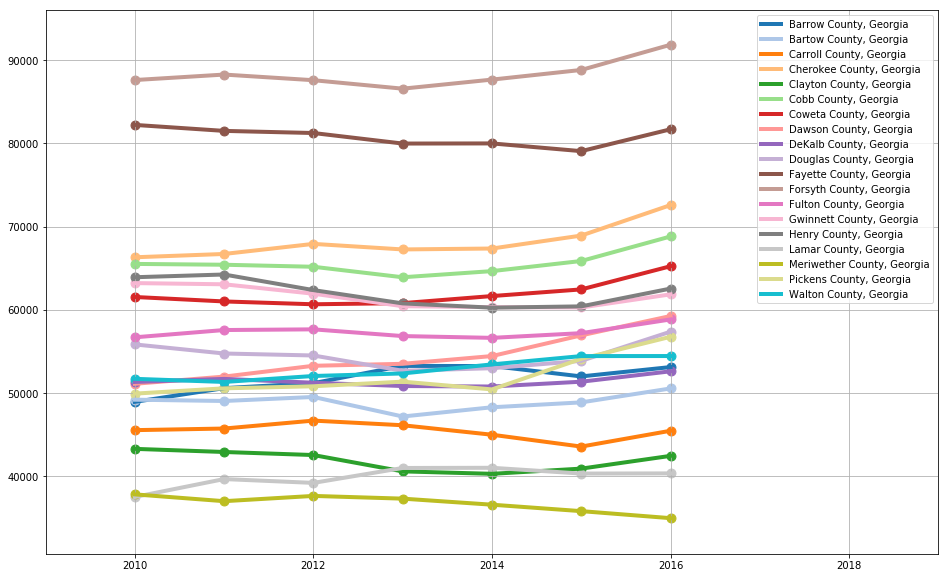

In [7]:
income_house_hold = census_data[['Household Income 2010',
             'Household Income 2011',
             'Household Income 2012',
             'Household Income 2013',
             'Household Income 2014',
             'Household Income 2015',
             'Household Income 2016'
            ]].astype('float')

print_plot(income_house_hold, years, (2009, 2019))